In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=deccf1bf492c608ddcf36a82f185ac7719791bb4951c3ee9da07cb4f52bc9be4
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
%cd "drive/MyDrive/Bionformatics_Project/Colab"

/content/drive/MyDrive/Bionformatics_Project/Colab


In [ ]:
from Classes.DataManager import DataManager
from Classes.CNN1D import projCNN1D
from tensorflow import keras
import numpy as np
import h5py

%load_ext tensorboard

importing Jupyter notebook from DataManager.ipynb
importing Jupyter notebook from CNN1D.ipynb
Populating the interactive namespace from numpy and matplotlib


data loading takes at most 17s

In [ ]:
dm = DataManager(transformer=False, micro=False, tf=True)
X_trainhalflife, X_trainpromoter, y_train, _, X_traintf                 = dm.get_train(True, False, False)
X_validationhalflife, X_validationpromoter, y_validation, _, X_validtf  = dm.get_validation(True, False, False)
X_testhalflife, X_testpromoter, y_test, _, X_testtf                     = dm.get_test(True, False, False)

Preprocessing-> Padding

In [ ]:
leftpos  = 3_000          #3_000 
rightpos = 13_500         #13_500

maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10500


In [ ]:
X_trainpromoter_p         = X_trainpromoter_[:, leftpos:rightpos, :]
X_validationpromoter_p = X_validationpromoter[tpos:rightpos, :]
X_testpromoter_p          = X_testpromoter[:, leftpos:rightpos, :]

INFO:tensorflow:Initializing the TPU system: grpc://10.57.122.66:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.57.122.66:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10500, 4)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 10500, 128)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 350, 128)     0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 350, 32)      36896       max_pooling1d[0][0]              
__________________________________________________________________________________

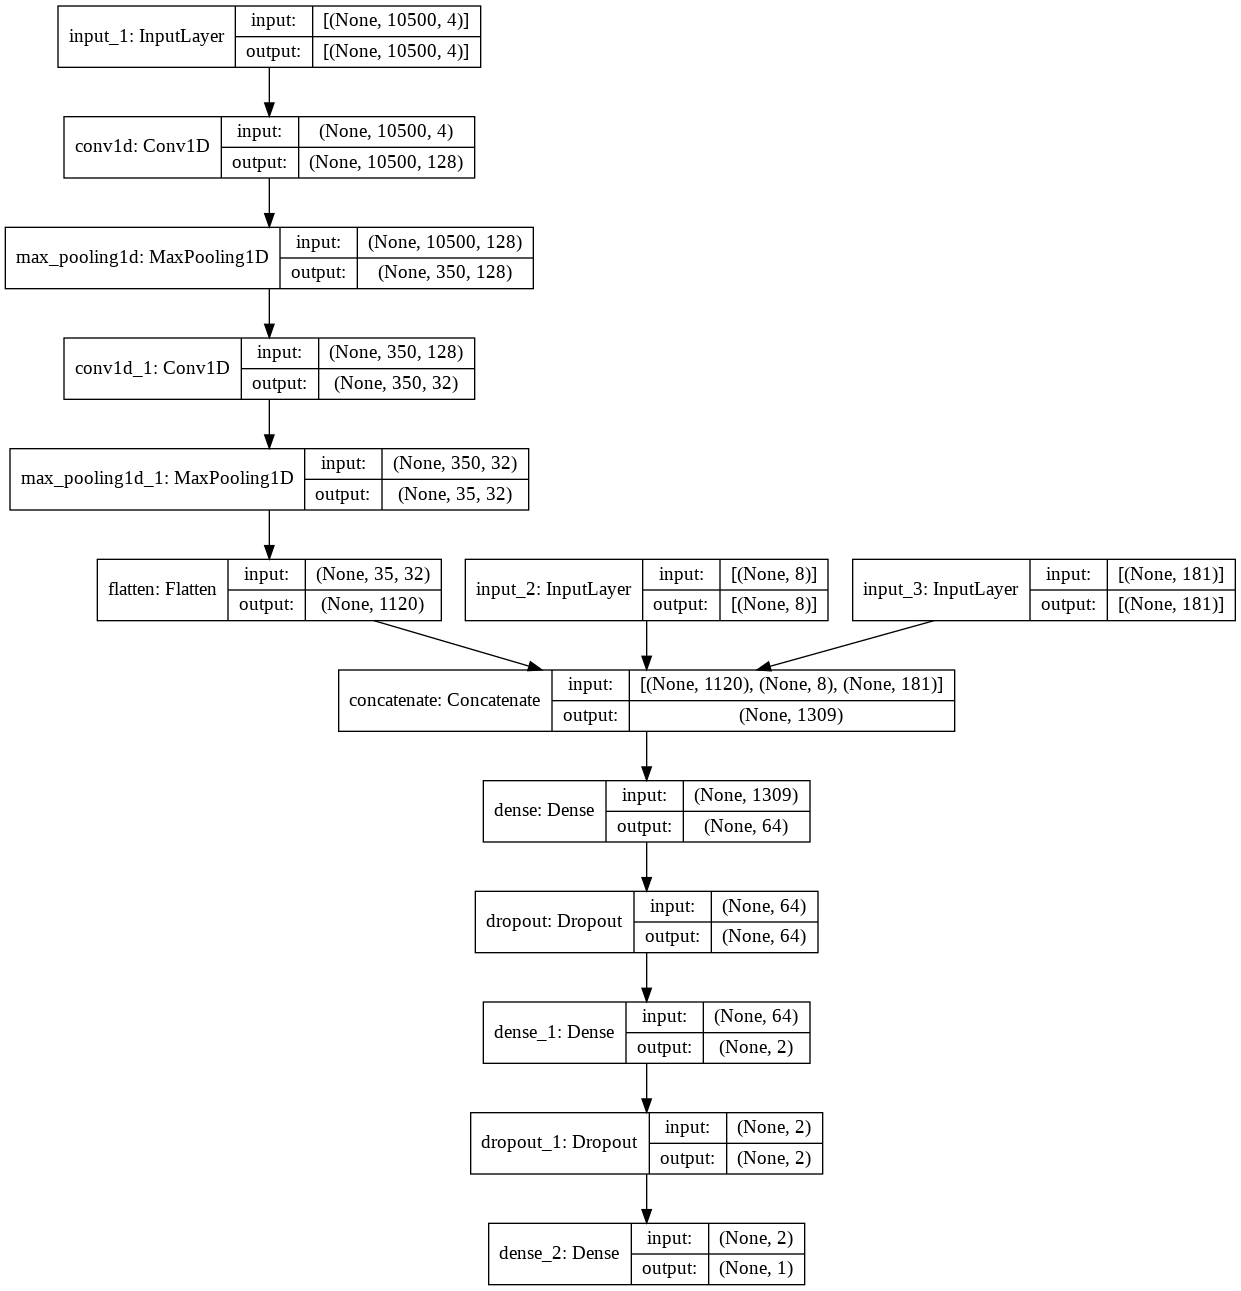


Parameters:
{'checkpoint_dir': 'TF1/', 'model_type': 'Xpresso_TF', 'n_epochs': 100, 'batch_size': 128, 'learning_rate': 0.0005, 'momentum': 0.9, 'CNN_input': (10500, 4), 'miRNA_input': (2064,), 'dropout_rate': 0.5, 'lr_reduction_epoch': None, 'shuffle': True, 'logdir': 'logs/Xpresso_TF_0-006', 'patience': 10, 'n_components_LSA': 100, 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7fc0c1f2cc10>}



In [ ]:
# # Clear any logs from previous runs
#!rm -rf ./logs/Xpresso_0-006/
# maxlen=18850
model_type="Xpresso_TF"
checkpoint_dir="TF1/"
logdir = None#f"{model_type}_0-006"

import tensorflow as tf
######################################################################################################################

tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)


with strategy.scope():
    net = projCNN1D(shuffle=True, checkpoint_dir=checkpoint_dir, patience=10, model_type=model_type, n_epochs=100, batch_size=128, learning_rate=5e-4, CNN_input=(maxlen, 4), dropout_rate=0.5, logdir=logdir)
    
########################################################################################################################

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 11s 57ms/step - loss: 0.4542 - val_loss: 0.3930
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 3s 21ms/step - loss: 0.3918 - val_loss: 0.3538
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 3s 21ms/step - loss: 0.3588 - val_loss: 0.3386
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 3s 22ms/step - loss: 0.3494 - val_loss: 0.3186
Epoch 5/100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 2s 20ms/step - loss: 0.3363 - val_loss: 0.3333
Epoch 6/100

Epoch 00006: LearningRateScheduler reducing learnin

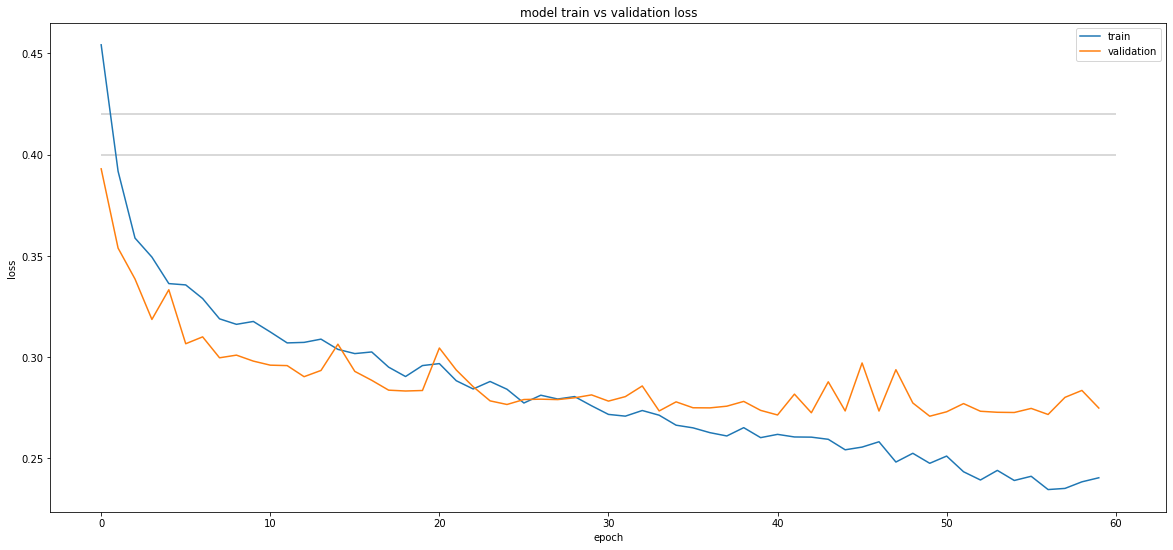

In [ ]:
net.train_model([X_trainpromoter_p, X_trainhalflife, X_traintf], y_train, [X_validationpromoter_p, X_validationhalflife, X_validtf], y_validation, True)

In [ ]:
net.evaluate([X_testpromoter_p, X_testhalflife, X_testtf], y_test)

Test R^2 = 0.742


0.7421355870524381

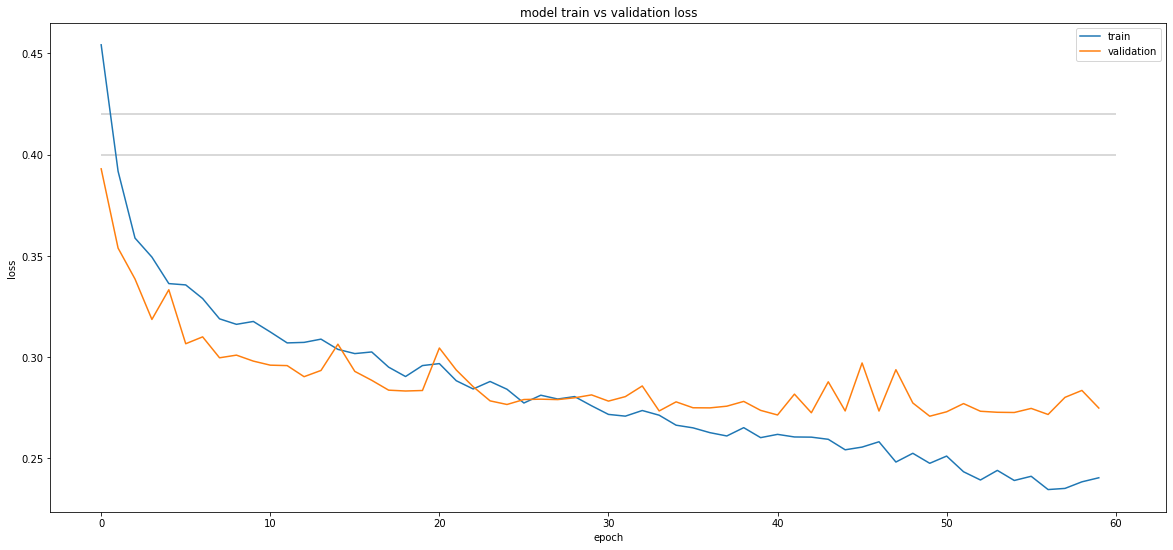

In [ ]:
net.plot_train()

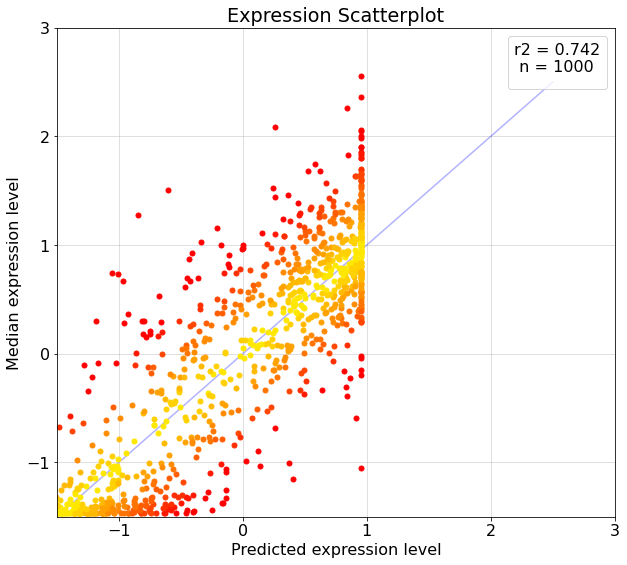

In [ ]:
net.plot_r2([X_testpromoter_p, X_testhalflife, X_testtf], y_test, True)

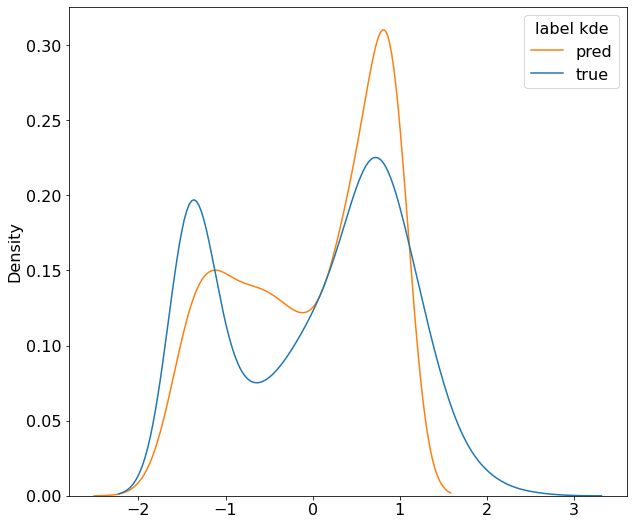

In [ ]:
import seaborn as sns 
pred = net.model.predict([X_testpromoter_p, X_testhalflife, X_testtf]).flatten()
g = sns.kdeplot(data=[y_test, pred])
plt.legend(title='label kde', loc='upper right', labels=['pred', 'true'])
plt.show(g)

INFO:tensorflow:Initializing the TPU system: grpc://10.57.122.66:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.57.122.66:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10500, 4)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 10500, 128)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 350, 128)     0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 350, 32)      36896       max_pooling1d[0][0]              
__________________________________________________________________________________

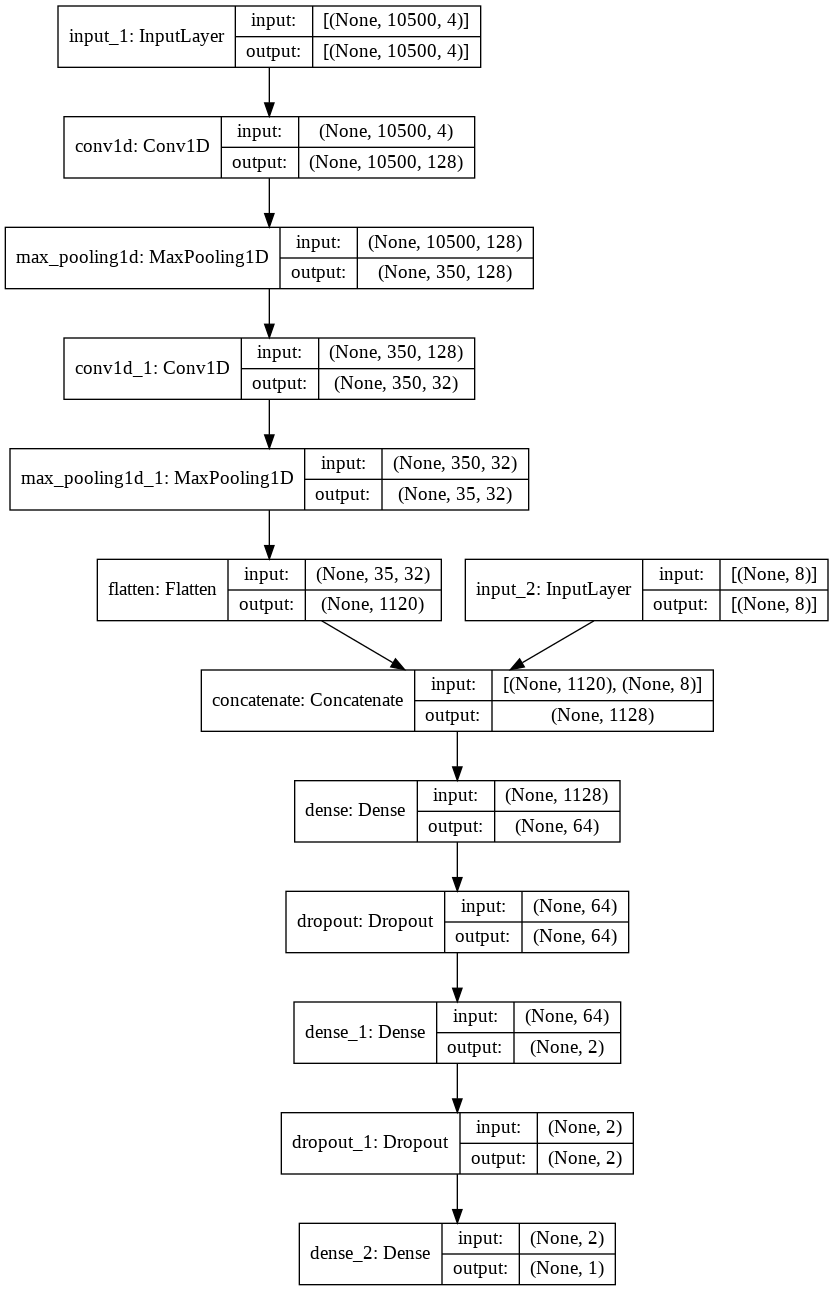


Parameters:
{'checkpoint_dir': 'micro1X_1/', 'model_type': 'Xpresso', 'n_epochs': 300, 'batch_size': 128, 'learning_rate': 0.0005, 'momentum': 0.9, 'CNN_input': (10500, 4), 'miRNA_input': (2064,), 'dropout_rate': 0.5, 'lr_reduction_epoch': None, 'shuffle': True, 'logdir': 'logs/Xpresso_0-006', 'patience': 7, 'n_components_LSA': 100, 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7fc0bc7358d0>}



In [ ]:
# # Clear any logs from previous runs
#!rm -rf ./logs/micro1X-006/
# maxlen=18850
model_type="Xpresso"
checkpoint_dir="micro1X_1/"
logdir = None#f"{model_type}_0-006"



######################################################################################################################

tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)


with strategy.scope():
    net2 = projCNN1D(shuffle=True, checkpoint_dir=checkpoint_dir, model_type=model_type, n_epochs=300, batch_size=128, learning_rate=5e-4, CNN_input=(maxlen, 4), dropout_rate=0.5, logdir=logdir, patience=7)
    
########################################################################################################################

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 11s 58ms/step - loss: 0.9062 - val_loss: 0.8225
Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 2s 20ms/step - loss: 0.8360 - val_loss: 0.7851
Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 2s 19ms/step - loss: 0.7907 - val_loss: 0.7392
Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 2s 19ms/step - loss: 0.7369 - val_loss: 0.6918
Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 2s 20ms/step - loss: 0.6820 - val_loss: 0.6332
Epoch 6/300

Epoch 00006: LearningRateScheduler reducing learnin

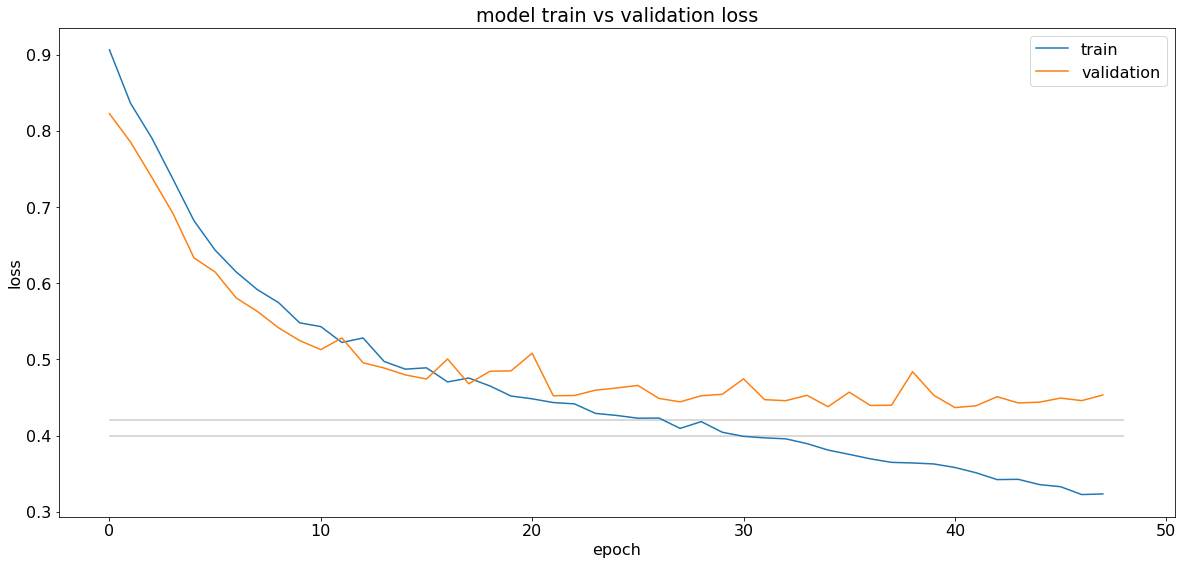

In [ ]:
net2.train_model([X_trainpromoter_p, X_trainhalflife], y_train, [X_validationpromoter_p, X_validationhalflife], y_validation, True)

In [ ]:
net2.evaluate([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.584


0.5844819674722226

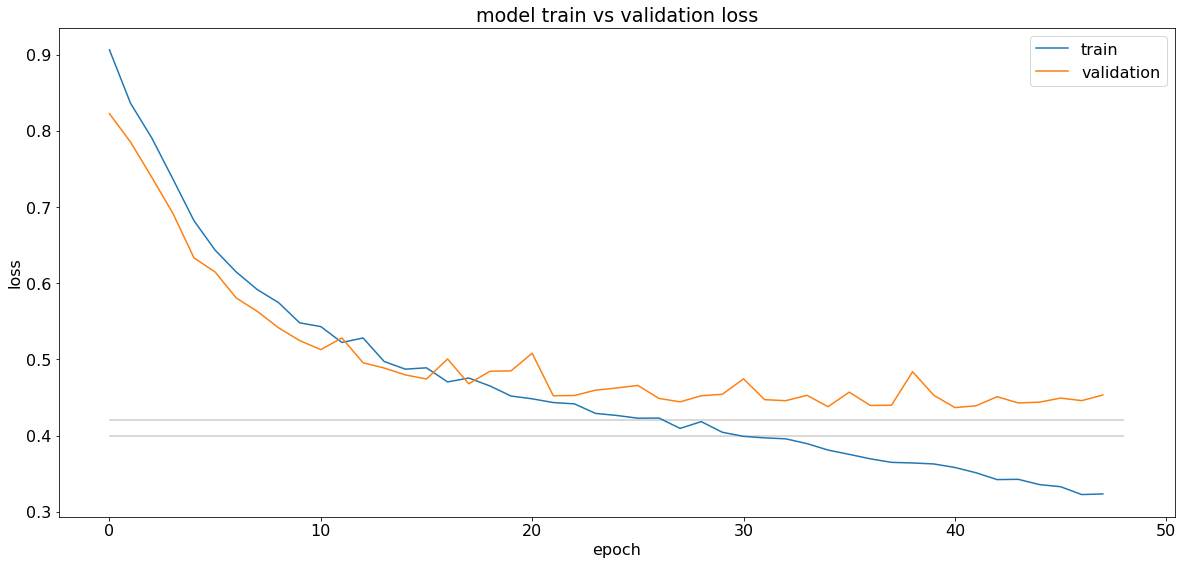

In [ ]:
net2.plot_train()

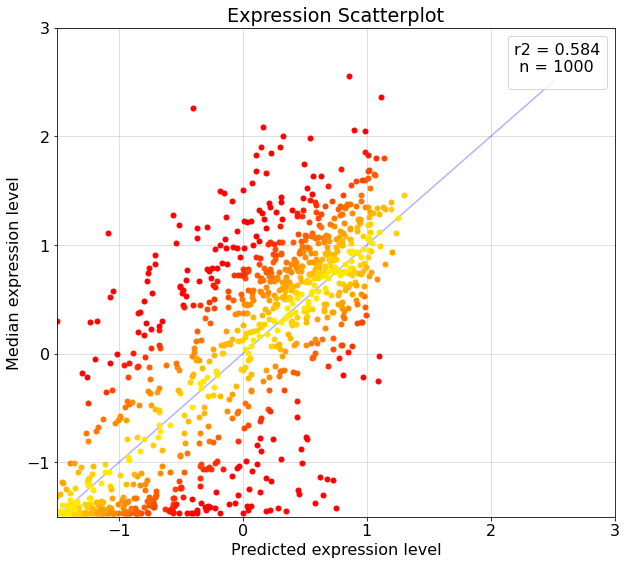

In [ ]:
net2.plot_r2([X_testpromoter_p, X_testhalflife], y_test, True)

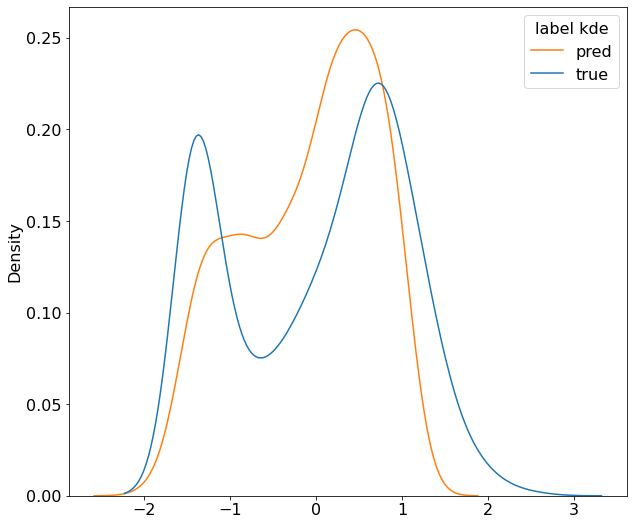

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
pred2 = net2.model.predict([X_testpromoter_p, X_testhalflife]).flatten()
g = sns.kdeplot(data=[y_test, pred2])
plt.legend(title='label kde', loc='upper right', labels=['pred2', 'true'])
plt.show(g)

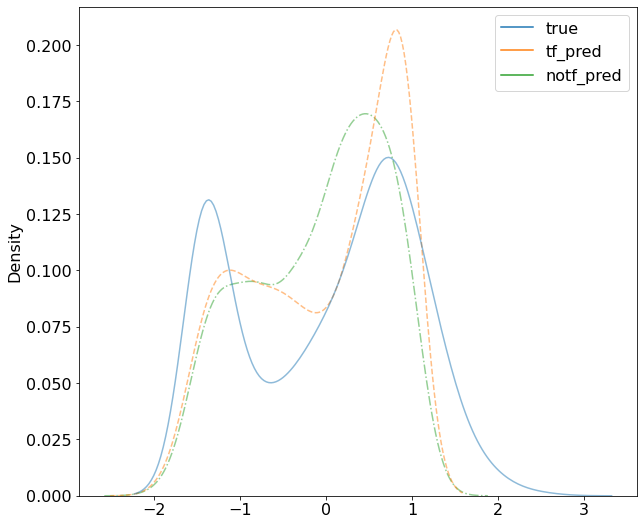

In [ ]:
import pandas as pd
df = pd.DataFrame({"true":y_test, "tf_pred":pred, "notf_pred":pred2})
ax = sns.kdeplot(data=df, linestyle="solid")
#  '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
styles = ["dashdot", "dashed", "solid"]
for line, s in zip(ax.get_lines(), styles):
    line.set_alpha(0.5)
    line.set_linestyle(s)
plt.show()



In [ ]:
df.to_csv(r'dataframe_madonna.csv')